<font size="8">**Neural Networks**, how to use the **professional** toolkits</font>


In our previous workshop we implemented a neural network from scratch. In this workshop we want to explain how **professional toolkits** are used to setup, train and run neural networks. The two most widely used toolkits are **PyTorch** (Facebook) and **TensorFlow** (google). Here, we will **concentrate** on **PyTorch**.

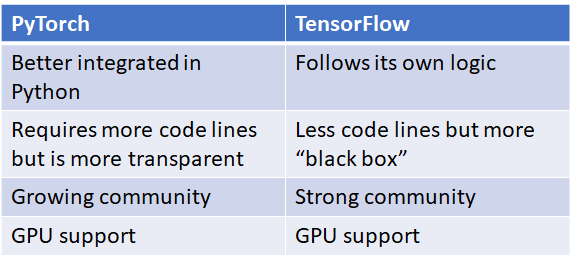

<br>

# **Tensors** in Pytorch

Tensors are the **basic datatype** for neural networks. Every calculation step in PyTorch is based on **tensor operations**. Tensors can have arbitrary dimensions:
- **Scalars** are tensors of dimension 0
- **Vectors** are tensors of dimension 1
- **Matrices** are tensors of dimension 2
- **"Tensors"** are tensors of dimension $ \geq $ 3

<br>

## Tensor **definitions**

In [1]:
import torch

In [2]:
# torch.empty(size): uninitiallized
x = torch.empty(1) # scalar
print(x)

tensor([0.])


In [3]:
# torch.zeros(size): fill with zeros
x = torch.zeros(3) # vector
print(x)

tensor([0., 0., 0.])


In [4]:
# torch.ones(size): fill with ones
x = torch.ones(3, 5) # matrix
print(x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [5]:
# torch.rand(size): uniform random numbers from range [0, 1]
x = torch.rand(3, 5, 2) # 3-dimensional tensor
print(x)

tensor([[[0.3077, 0.0630],
         [0.9560, 0.3193],
         [0.3796, 0.6445],
         [0.7219, 0.5669],
         [0.0139, 0.9599]],

        [[0.7239, 0.5558],
         [0.5108, 0.2456],
         [0.7633, 0.6063],
         [0.1151, 0.2971],
         [0.5952, 0.7454]],

        [[0.3021, 0.8024],
         [0.6171, 0.5539],
         [0.7793, 0.7116],
         [0.1617, 0.4293],
         [0.1080, 0.9228]]])


In [6]:
# torch.randn(size): random numbers from standard normal distribution
x = torch.randn(4, 3) # matrix
print(x)

tensor([[-0.9871, -0.1957,  1.0396],
        [-0.0640,  0.7593, -1.3143],
        [-0.5685, -0.5340, -0.3119],
        [ 0.0751, -0.8985, -0.5628]])


In [7]:
# Check size of tensor
print(x.size())

torch.Size([4, 3])


In [8]:
# Check data type of a tensor
print(x.dtype)

torch.float32


In [9]:
# Specify data types, float32 is default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)


In [10]:
# Construct tensor from data
x = torch.tensor([[5.5, 3],[4, 8.3]], dtype=torch.float16)
print(x)
print(x.size())
print(x.dtype)

tensor([[5.5000, 3.0000],
        [4.0000, 8.2969]], dtype=torch.float16)
torch.Size([2, 2])
torch.float16


In [11]:
# numpy to torch tensors
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [12]:
# The way back: from tensor to numpy
c = b.numpy()
print(b)
print(f"Type of c: {c.dtype}, content: {c}")

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
Type of c: float64, content: [1. 1. 1. 1. 1.]


<br>

## Basic tensor **operations**

In [13]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
print(f"x:\n{x}")
print(f"y:\n{y}")

x:
tensor([[0.4621, 0.5643],
        [0.5618, 0.1737]])
y:
tensor([[0.3440, 0.2677],
        [0.5438, 0.9813]])


In [14]:
# Elementwise addition
z = x + y
# torch.add(x,y)
print(z)

tensor([[0.8062, 0.8321],
        [1.1056, 1.1551]])


In [15]:
# In place addition, everything with a trailing underscore is an inplace operation
y.add_(x)

tensor([[0.8062, 0.8321],
        [1.1056, 1.1551]])

In [16]:
# Subtraction
z = x - y
# z = torch.sub(x, y)
print(z)

tensor([[-0.3440, -0.2677],
        [-0.5438, -0.9813]])


In [17]:
# Multiplication
z = x * y
# z = torch.mul(x,y)
print(z)

tensor([[0.3725, 0.4696],
        [0.6211, 0.2007]])


In [18]:
# Division
z = x / y
# z = torch.div(x,y)
print(z)

tensor([[0.5732, 0.6782],
        [0.5081, 0.1504]])


<br>

## **Slicing** a tensor

In [19]:
x = torch.rand(5,3)
print(x)

tensor([[0.4085, 0.4652, 0.2537],
        [0.5014, 0.7025, 0.8194],
        [0.3579, 0.9786, 0.0275],
        [0.2750, 0.0319, 0.2151],
        [0.1474, 0.0201, 0.7596]])


In [20]:
# Slice a column
print(x[:, 0]) # all rows, column 0

tensor([0.4085, 0.5014, 0.3579, 0.2750, 0.1474])


In [21]:
# Slice a row
print(x[1, :]) # row 1, all columns

tensor([0.5014, 0.7025, 0.8194])


In [22]:
# Slice a specific element
print(x[1,1]) # element at 1, 1

tensor(0.7025)


In [23]:
# Get the actual value if only 1 element is in your tensor
print(x[1,1].item())

0.7025341391563416


<br>

## **Reshape** a tensor

In [24]:
x = torch.randn(4, 4)
print(x)
print(x.size())

tensor([[ 0.8941,  0.1622,  0.8411, -1.2612],
        [ 1.2409, -2.4623, -1.3195,  1.1727],
        [-1.2354,  1.9122, -0.3904, -0.5794],
        [-1.4022,  0.9281, -0.0274, -0.0324]])
torch.Size([4, 4])


In [25]:
# Reshape all elements to one row
y = x.view(16)
print(y)
print(y.size())

tensor([ 0.8941,  0.1622,  0.8411, -1.2612,  1.2409, -2.4623, -1.3195,  1.1727,
        -1.2354,  1.9122, -0.3904, -0.5794, -1.4022,  0.9281, -0.0274, -0.0324])
torch.Size([16])


In [26]:
# Leave one dimension open for fitting: -1
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(z)
print(z.size())

tensor([[ 0.8941,  0.1622,  0.8411, -1.2612,  1.2409, -2.4623, -1.3195,  1.1727],
        [-1.2354,  1.9122, -0.3904, -0.5794, -1.4022,  0.9281, -0.0274, -0.0324]])
torch.Size([2, 8])


<br>

# **Gradient calculation** - the essence of learning

As we have seen in many previous workshops, learning the parameters of a ML model is related to calulating their **derivatives**. The derivative tells us what is the effect of a change in the **input** variable on the **output** variable and **vice versa**: In Machine Learning we usually determine in which **direction** and to what **extent** we have to change the **weights** in order to reduce the **cost function** to its minimum.

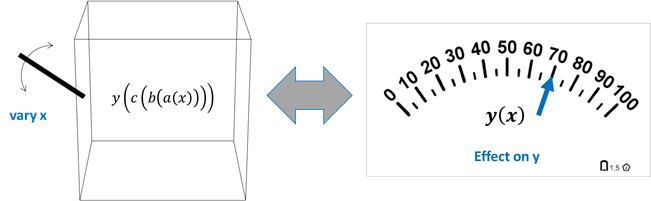

PyTorch can calculate the derivatives for us automatically. The **autograd package** provides automatic differentiation for all operations on tensors. To tell PyTorch that we want the gradient, we have to set `requires_grad=True`. With this attribute set, all operations on the tensor are tracked in the computational graph.

<br>

## **Examples:** Polynomials

### Simple polynomial

Let's study some examples:

$ y = 2x^2 + 5x + 7 $

$ \frac{dy}{dx} = 4x + 5 $

With $x=5$ we get:

$ \frac{dy}{dx} = 4 \cdot 5 + 5 = 25 $

In [27]:
# In PyTorch we need to define the variable that is the target of the derivation first.
# Here: x
x = torch.tensor([5.], requires_grad=True)
print(x)

tensor([5.], requires_grad=True)


In [28]:
# Define y - the operations can be conducted in several subsequent steps, too.
y = 2 * x**2 + 5 * x + 7
print(y)

tensor([82.], grad_fn=<AddBackward0>)


In [29]:
# Calculate the derivative dy/dx
y.backward()

In [30]:
# Now we can call the .grad attribute for x
x.grad

tensor([25.])

<br>

### Including chain rule

Let's do a slightly more complicated example:

$ y = \sqrt{2x^2 + 5x + 7} $

$ \displaystyle \frac{dy}{dx} = \frac{1}{2} \cdot \frac{1}{\sqrt{ 2x^2 + 5x + 7 }} \cdot \left( 4x + 5 \right) $

With $x=5$ we get:

$ \displaystyle \frac{dy}{dx} = \frac{1}{2} \cdot \frac{1}{\sqrt{ 2\cdot 5^2 + 5 \cdot 5 + 7 }} \cdot \left( 4 \cdot 5 + 5 \right) = 1.3804 $

In [31]:
# We need to define x:
x = torch.tensor([5.], requires_grad=True)
print(x)

tensor([5.], requires_grad=True)


In [32]:
# Define y - The operation can be done in one step, too.
y = 2 * x**2 + 5 * x + 7
y = torch.sqrt(y)
print(y)

tensor([9.0554], grad_fn=<SqrtBackward0>)


In [33]:
# Calculate the derivative dy/dx
y.backward()

In [34]:
# Now we can call the .grad attribute for x
x.grad

tensor([1.3804])

<br>

## **Examples:** Cost function with 3 weights

For us the most frequent application of the (partial) derivative is the minimization of a cost function. We want to find the weights that lead to the smallest costs in our model. We use the partial derivatives to find the direction and the extent of adjustment for each weight separately.

Assume we have three features in our data. Then we have three weights and a bias in our model.

$ \mathbf{w} = 
\begin{pmatrix}
w_1 \\
w_2 \\
w_3 
\end{pmatrix}
$

In a linear model we get the predicted values from the linear combination of the values of a particular sample $\left( x_{i,1}, x_{i, 2}, x_{i, 3} \right) $ and the corresponding weights $ \left( w_1, w_2, w_3 \right) $ plus the bias $ b $:

$ \hat y_i =
\begin{pmatrix}
x_{i,1} & x_{i, 2} & x_{i, 3}
\end{pmatrix} \cdot
\begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix} + b = x_{i,1} w_1 + x_{i,2}w_2 + x_{i,3}w_3 + b $

The cost function $J$ is usually the sum of the squared sample errors.

$ J = \displaystyle \sum_i \left( \hat y_i - y_i \right)^2 = \sum_i \big( \underbrace{ x_{i,1} w_1 + x_{i,2}w_2 + x_{i,3}w_3 + b}_{\hat y_i} - y_i \big)^2 $

Let's say we have only **2 samples** which we assign the **indices $ i=1,2 $**. Then the cost function becomes:

$ J = \displaystyle \big( \overbrace{ \underbrace{x_{1,1} w_1 + x_{1,2}w_2 + x_{1,3}w_3 + b}_{\hat y_1} -y_1}^{\text{error of sample 1}} \big)^2 + \big( \overbrace{ \underbrace{x_{2,1} w_1 + x_{2,2}w_2 + x_{2,3}w_3 + b}_{\hat y_2} - y_2}^{\text{error of sample 2}} \big)^2 $

According to the **chain rule** $ \big( z \big( y ( x )  \big) \rightarrow \frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx} \big) $ the derivatives of the cost function $ J $ with respect to the weights are:

$
\displaystyle
\left.
\begin{matrix}
\displaystyle \frac{\partial J}{\partial w_1} = 2 \cdot \left( x_{1,1} w_1 + x_{1,2}w_2 + x_{1,3} w_3 + b -y_1 \right) \cdot x_{1,1} + 2 \cdot \left( x_{2,1} w_1 + x_{2,2}w_2 + x_{2,3}w_3 + b - y_2 \right) \cdot x_{2,1} \\
\displaystyle \frac{\partial J}{\partial w_2} = 2 \cdot \left( x_{1,1} w_1 + x_{1,2}w_2 + x_{1,3} w_3 + b -y_1 \right) \cdot x_{1,2} + 2 \cdot \left( x_{2,1} w_1 + x_{2,2}w_2 + x_{2,3}w_3 + b - y_2 \right) \cdot x_{2,2} \\
\displaystyle \frac{\partial J}{\partial w_3} = 2 \cdot \left( x_{1,1} w_1 + x_{1,2}w_2 + x_{1,3} w_3 + b -y_1 \right) \cdot x_{1,3} + 2 \cdot \left( x_{2,1} w_1 + x_{2,2}w_2 + x_{2,3}w_3 + b - y_2 \right) \cdot x_{2,3}
\end{matrix}
\right\}
= \frac{\partial J}{\partial w_j} = \sum_i 2 \cdot \left( \hat y_i - y_i \right) \cdot x_{i,j}
$

$
\displaystyle \frac{\partial J}{\partial b} = 2 \cdot \left( x_{1,1} w_1 + x_{1,2}w_2 + x_{1,3} w_3 + b -y_1 \right) + 2 \cdot \left( x_{2,1} w_1 + x_{2,2}w_2 + x_{2,3}w_3 + b - y_2 \right)
$

Next, we assume some values and calculate the gradients **manually**. Let $X$ and $w$ have the following (starting) values:

$
X =
\begin{pmatrix}
2 & 3 & 2 \\
4 & 2.5 & 1.5
\end{pmatrix},
\quad
w = 
\begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix},
\quad
y = 
\begin{pmatrix}
10 \\
9
\end{pmatrix},
\quad
b=0
$

$ \displaystyle \frac{\partial J}{\partial w_1} = 2 \cdot \big( \overbrace{ 2 \cdot 1 + 3 \cdot 2 + 2 \cdot 3 + 0 -10}^{4} \big) \cdot 2 + 2 \cdot \big( \overbrace{ 4 \cdot 1 + 2.5 \cdot 2 + 1.5 \cdot 3 + 0 - 9}^{4.5} \big) \cdot 4 = 52 $

$ \displaystyle \frac{\partial J}{\partial w_2} = 2 \cdot \left( 2 \cdot 1 + 3 \cdot 2 + 2 \cdot 3 + 0 -10 \right) \cdot 3 + 2 \cdot \left( 4 \cdot 1 + 2.5 \cdot 2 + 1.5 \cdot 3 + 0 - 9 \right) \cdot 2.5 = 46.5 $

$ \displaystyle \frac{\partial J}{\partial w_3} = 2 \cdot \left( 2 \cdot 1 + 3 \cdot 2 + 2 \cdot 3 + 0 -10 \right) \cdot 2 + 2 \cdot \left( 4 \cdot 1 + 2.5 \cdot 2 + 1.5 \cdot 3 + 0 - 9 \right) \cdot 1.5 = 29.5 $

$ \displaystyle \frac{\partial J}{\partial b} = 2 \cdot \left( 2 \cdot 1 + 3 \cdot 2 + 2 \cdot 3 + 0 -10 \right) + 2 \cdot \left( 4 \cdot 1 + 2.5 \cdot 2 + 1.5 \cdot 3 + 0 - 9 \right) = 17 $

In [35]:
# Define feature matrix with two samples
X = torch.tensor([[2., 3., 2.], [4., 2.5, 1.5]])
print(f"Feature matrix X: \n{X}")

Feature matrix X: 
tensor([[2.0000, 3.0000, 2.0000],
        [4.0000, 2.5000, 1.5000]])


In [36]:
# Define weight vector with initial values
w = torch.tensor([1., 2., 3.], requires_grad=True)
print(f"Weight vector w: \n{w}")

Weight vector w: 
tensor([1., 2., 3.], requires_grad=True)


In [37]:
# Define bias with initial value
b = torch.tensor([0.], requires_grad=True)
print(f"Bias: \n{b}")

Bias: 
tensor([0.], requires_grad=True)


In [38]:
# Define true value vector y
y = torch.tensor([10, 9])
print(f"True label vector y: \n{y}")

True label vector y: 
tensor([10,  9])


In [39]:
# Calculate predicted labels y_hat
y_hat = torch.matmul(X, w) + b
print(f"Predicted labels y_hat: \n{y_hat}")

Predicted labels y_hat: 
tensor([14.0000, 13.5000], grad_fn=<AddBackward0>)


In [40]:
# Calculate costs J
J = ((y_hat - y)**2).sum()
print(f"Costs J for given x, w and b: \n{J}")

Costs J for given x, w and b: 
36.25


In [41]:
# Calculate the gradient function
J.backward()

In [42]:
# Evaluate gradients for weights
print(f"dJ/dw1, dJ/dw2, dJ/dw3: \n{w.grad}")
print(f"\ndJ/db: \n{b.grad}")

dJ/dw1, dJ/dw2, dJ/dw3: 
tensor([52.0000, 46.5000, 29.5000])

dJ/db: 
tensor([17.])


<br>

## **Empty** gradients

`backward()` **accumulates** the gradient into the `.grad` attribute. We need to be careful during optimization!
$\rightarrow$ Use `.zero_()` to empty the gradients before a new optimization step!

In [43]:
# Define initial weights
weights = torch.ones(4, requires_grad=True)
print(f"Initial weights:\n{weights}\n")

# Iterate over epochs
for epoch in range(3):

    #Forward propagation
    output = (weights * 3).sum()
    
    # Calculate gradients
    output.backward()
    print(f"Weight in epoch {epoch}: {weights}")

    # Adjust weights
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # Empty gradient before new epoch!
    weights.grad.zero_()

print(f"\nFinal output: {output}")

Initial weights:
tensor([1., 1., 1., 1.], requires_grad=True)

Weight in epoch 0: tensor([1., 1., 1., 1.], requires_grad=True)
Weight in epoch 1: tensor([0.7000, 0.7000, 0.7000, 0.7000], requires_grad=True)
Weight in epoch 2: tensor([0.4000, 0.4000, 0.4000, 0.4000], requires_grad=True)

Final output: 4.799999713897705


<br>

# **Implementation example:** Linear regression

In order to demonstrate the use of PyTorch in practice let's implement a linear regression model once **manually** and once **with PyTorch**. We stick with the standard equations for predicting $\hat y$ and calculating the loss $J$ (cost function):

$ \displaystyle \hat y = \mathbf{X} \cdot \mathbf{w} + b \quad \quad J = \frac{1}{N} \sum \limits_{i=1}^{N} \left( \hat y - y \right)^2$

Here, we want to check the calculation results in 3D. Hence, in our particular example $\mathbf{w}$ is a vector of **2 weights** and $\mathbf{X}$ is the feature matrix with **100 samples** and **2 features** each.

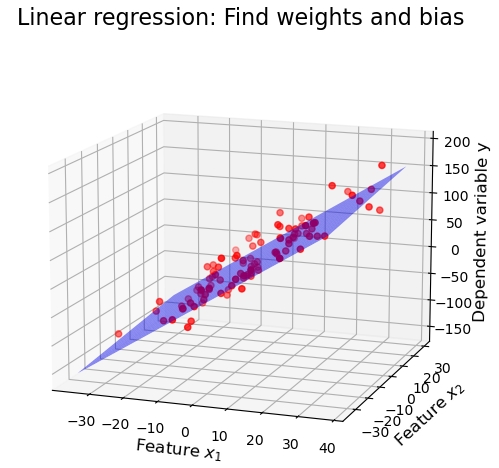

<br>

## Data preparation

In [44]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Prepare dummy data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)

# Cast to tensors
X_numpy *= 15
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

# Number of samples and features
n_samples, n_features = X.shape

<br>

## **Manual** implementation

For the manual implementation we need the gradients of the cost function (loss) with respect to the **weights** and the **bias**.

$ \displaystyle J = \frac{1}{N} \sum \limits_{i=1}^{N} \left( \hat y - y \right)^2 =  \frac{1}{N} \sum \limits_{i=1}^{N} \left( \mathbf{X} \cdot \mathbf{w} + b - y \right)^2 $

$ \displaystyle \frac{\partial J}{\partial w_j} = \frac{1}{N} \sum \limits_{i=1}^{N}  2 \cdot \left( \hat y_i - y_i \right) \cdot x_{i, j} \quad \quad $ or in matrix-vector-notation $\quad \quad \displaystyle \frac{\partial J}{\partial \mathbf{w}} = \frac{1}{N} \cdot \mathbf{X^T} \cdot 2 \left( \mathbf{\hat y} - \mathbf{y} \right) \quad \quad $ and for the bias

$ \displaystyle \frac{\partial J}{\partial b} = \frac{1}{N} \sum \limits_{i=1}^{N}  2 \cdot \left( \hat y_i - y_i \right) $

In [45]:
%matplotlib


# Set up linear model y = X*w + b
def forward(X):
    return torch.matmul(X, w) + b

# Set up loss function (MSE)
def loss(y_pred, y):
    # loss = 1/N * (y_pred - y)**2
    return ((y_pred - y)**2).mean()

# Gradients
def gradients(X, y, y_pred):
    # dJ/dw = 1/N * 2X dot (y_pred - y)
    dw = torch.matmul(X.T, 2*(y_pred - y)) / X.size(0)
    # dJ/db = 2/N * Sum(y_pred - y)
    db = 2 * (y_pred - y).sum() / X.size(0)
    return dw, db

# Initialize weights and bias
w = torch.tensor([[0.], [0.]])
b = torch.tensor([0.])

# Prepare plot
x1_min = X[:,0].min().item(); x1_max = X[:,0].max().item()
x2_min = X[:,1].min().item(); x2_max = X[:,1].max().item()
X1_p, X2_p = np.meshgrid(np.arange(x1_min, x1_max), np.arange(x2_min, x2_max))

# Training loop
num_epochs = 65
learning_rate = 0.0001
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')

for epoch in range(num_epochs):
    # Forward pass
    y_pred = forward(X)
    
    # Loss
    l = loss(y_pred, y)
    
    # Calculate gradients
    g = gradients(X, y, y_pred)
    dw = g[0]
    db = g[1]

    # Update weight and bias
    w -= learning_rate * dw
    b -= learning_rate * db

    # Plot intermediate results
    if (epoch+1) % 1 == 0:
        # Plot actual regression line
        ax.clear()
        ax.set_title('Linear regression: Find weights and bias', fontsize=16)
        ax.set_xlabel('Feature $x_1$', fontsize=12)
        ax.set_ylabel('Feature $x_2$', fontsize=12)
        ax.set_zlabel('Dependent variable y', fontsize=12)
        ax.scatter(X[:,0].numpy(), X[:,1].numpy(), y.numpy(), color='red')
        Y_p = w[0]*X1_p + w[1]*X2_p + b
        Y_p = Y_p.numpy()
        ax.plot_surface(X1_p, X2_p, Y_p, color='blue', alpha=0.5)
        plt.pause(0.3)

plt.show(block=True)

# Plot regression data
print(f'epoch: {epoch+1}, loss = {l.item():.3f}, weight = {w}, bias = {b.item():.3f}')

Using matplotlib backend: <object object at 0x0000025F4B3A9270>
epoch: 65, loss = 473.834, weight = tensor([[3.8057],
        [0.3965]]), bias = 0.080


<br>

## **PyTorch** implementation

In [46]:
%matplotlib

# Set up linear model y = X*w + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# Set up loss function (MSE) and optimizer
learning_rate = 0.0001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Prepare plot
x1_min = X[:,0].min().item(); x1_max = X[:,0].max().item()
x2_min = X[:,1].min().item(); x2_max = X[:,1].max().item()
X1_p, X2_p = np.meshgrid(np.arange(x1_min, x1_max), np.arange(x2_min, x2_max))

# Training loop
num_epochs = 65
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass and weight update
    loss.backward()
    optimizer.step()

    # Zero grad before new step
    optimizer.zero_grad()
    
    # Plot intermediate results
    if (epoch+1) % 1 == 0:
        w = model.weight[0]
        b = model.bias
        ax.clear()
        ax.set_title('Linear regression: Find weights and bias', fontsize=16)
        ax.set_xlabel('Feature $x_1$', fontsize=12)
        ax.set_ylabel('Feature $x_2$', fontsize=12)
        ax.set_zlabel('Dependent variable y', fontsize=12)
        ax.scatter(X[:,0].numpy(), X[:,1].numpy(), y.numpy(), color='red')
        Y_p = w[0].item()*X1_p + w[1].item()*X2_p + b.item()
        ax.plot_surface(X1_p, X2_p, Y_p, color='blue', alpha=0.5)
        plt.pause(0.3)

plt.show()

# Plot regression data
print(f'epoch: {epoch+1}, loss = {loss.item():.3f}, weight = {w}, bias = {b.item():.3f}')

Using matplotlib backend: QtAgg
epoch: 65, loss = 471.879, weight = tensor([3.7938, 0.3863], grad_fn=<SelectBackward0>), bias = 0.493


<br>

# **MLP in PyTorch** - handwritten digit recognition

As the final task of this session we want to implement the **Multi Layer Perceptron** from last session in **PyTorch**.

## Load libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

<br>

## Load data

In [2]:
# Data is stored in numpy zip file (.npz)
mnist = np.load('mnist_scaled.npz')

# Unpack data into train and test variables
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train', 
                                    'X_test', 'y_test']]

# Clear memory
del mnist

In [3]:
# Reshape arrays to 1x28x28 (1 color channel, 28x28 pixels)
X_train = X_train.reshape(-1,1,28,28)
X_test = X_test.reshape(-1,1,28,28)

# Check dimensions
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (60000, 1, 28, 28)
Shape y_train: (60000,)
Shape X_test: (10000, 1, 28, 28)
Shape y_test: (10000,)


<br>

## Define **datasets** and **dataloaders**

In [4]:
minibatch_size = 300

# Datasets (bundles of values and labels under the same index)
train_dataset = TensorDataset(torch.tensor(X_train[:55000], dtype=torch.float32),
                              torch.tensor(y_train[:55000], dtype=torch.int64))
val_dataset = TensorDataset(torch.tensor(X_train[55000:], dtype=torch.float32),
                            torch.tensor(y_train[55000:], dtype=torch.int64))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                             torch.tensor(y_test, dtype=torch.int64))

# Dataloader (iterator over the datasets)
train_loader = DataLoader(dataset=train_dataset, batch_size=minibatch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=minibatch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=minibatch_size, shuffle=False)

<br>

## Quick check data

In [5]:
# Load first batch of pictures with dataloader
examples = iter(test_loader)
example_data, example_targets = next(examples)

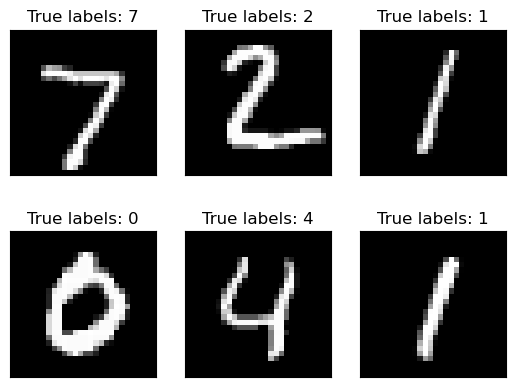

In [6]:
%matplotlib inline

# Plot the first 6 pictures in two rows
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"True labels: {example_targets[i]}")
    plt.xticks([]); plt.yticks([])
plt.show()

<br>

## **Implement** MLP in Pytorch

Our fully-connected feed-forward Neural Network has one **input layer**, one **hidden layer** and one **output layer**.

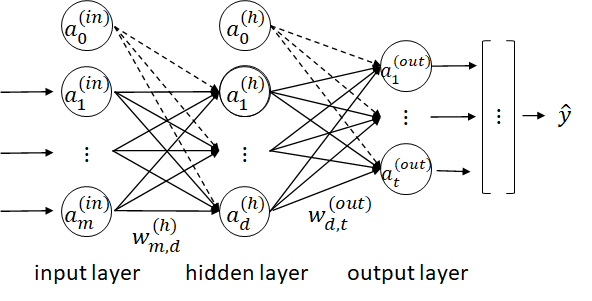

<br>

### Define the **network structure**

The structure of implementation in PyTorch is different to our manual implementation. In PyTorch, we encapsulate only the core structure of the network - the layers - in a class.

In [7]:
class NeuralNet_PyTorch(nn.Module):
    """
    Core definitions of MLP implemented in PyTorch

    Parameters
    ==========
    n_input : int
        Number of input units
    n_hidden : int (default: 30)
        Number of hidden units
    n_output : int (default: 10)
        Number of output units

    Methods
    =======
    forward:
        Computes forward propagation
    """

    def __init__(self, n_input, n_hidden=30, n_output=10):
        super(NeuralNet_PyTorch, self).__init__()
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output

        # Define model layers
        self.model_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.n_input, self.n_hidden),
            nn.Sigmoid(),
            nn.Linear(self.n_hidden, self.n_output),
            #nn.Sigmoid()
        )
        
    def forward(self, x):
        out = self.model_layers(x)
        return out

<br>

### Define test function

In [8]:
def test(dataloader, model):
    # Get dataset size
    dataset_size = len(dataloader.dataset)
    
    # Set model in evaluation mode
    model.eval()

    # Turn off gradient calculation for validation
    with torch.no_grad():
        # Loop over dataset
        correct = 0
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            
            # Get raw values from model (=forward propagation)
            output = model(images)
            
            # Derive prediction
            y_pred = output.argmax(1)
            
            # Count correct classifications over all batches
            correct += (y_pred == labels).type(torch.float32).sum().item()

        # Calculate accuracy
        acc = correct / dataset_size
        
    return acc

<br>

## **Apply** NeuralNet_PyTorch for **image recognition**

### Define parameters

In [9]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

# Hyper-parameters 
n_input = 28*28  # = 784
n_hidden = 100
n_output = 10
epochs = 100
learning_rate = 0.0005
shuffle = True

Using cuda device


<br>

### **Fit()** the model

In [10]:
# Instanciate the network
model = NeuralNet_PyTorch(n_input, n_hidden, n_output).to(device)
print(model)

NeuralNet_PyTorch(
  (model_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=100, bias=True)
    (2): Sigmoid()
    (3): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [11]:
# Define cost function (loss) and optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Loop over epochs
for epoch in range(epochs):
    n_correct=0; n_samples=0
    for idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        l = loss(outputs, labels)
              
        # Backward and optimize
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        # Get prediced labels (.max returns (value ,index))
        _, y_pred = torch.max(outputs.data, 1)

        # Count correct classifications
        n_correct += (y_pred == labels).sum().item()
        n_samples += labels.size(0)
        
    # At end of epoch: Eval accuracy and print information
    if (epoch+1) % 5 == 0:
        
        # Calculate accuracy
        acc_train = n_correct / n_samples
        acc_val = test(val_loader, model)
        
        # Print info
        print (f"Epoch [{epoch+1}/{epochs}], Loss: {l.item():.4f}")
        print(f"      Training accuracy: {acc_train*100:.1f}%")
        print(f"      Validation accuracy: {acc_val*100:.1f}%")

Epoch [5/100], Loss: 0.2287
      Training accuracy: 91.8%
      Validation accuracy: 93.9%
Epoch [10/100], Loss: 0.1927
      Training accuracy: 94.3%
      Validation accuracy: 95.8%
Epoch [15/100], Loss: 0.1428
      Training accuracy: 95.7%
      Validation accuracy: 96.5%
Epoch [20/100], Loss: 0.0458
      Training accuracy: 96.7%
      Validation accuracy: 97.0%
Epoch [25/100], Loss: 0.0714
      Training accuracy: 97.4%
      Validation accuracy: 97.1%
Epoch [30/100], Loss: 0.0628
      Training accuracy: 97.9%
      Validation accuracy: 97.5%
Epoch [35/100], Loss: 0.0565
      Training accuracy: 98.2%
      Validation accuracy: 97.6%
Epoch [40/100], Loss: 0.0737
      Training accuracy: 98.6%
      Validation accuracy: 97.5%
Epoch [45/100], Loss: 0.1018
      Training accuracy: 98.9%
      Validation accuracy: 97.6%
Epoch [50/100], Loss: 0.0586
      Training accuracy: 99.1%
      Validation accuracy: 97.7%
Epoch [55/100], Loss: 0.0401
      Training accuracy: 99.3%
      Valid

<br>

### **Test** model with unseen data

In [12]:
# Call 'test' function for test dataloader
acc_test = test(test_loader, model)

# Print result
print(f"Test accuracy: {acc_test*100:.1f}%")

Test accuracy: 97.4%


<br>